# Bank Turnover Dataset

### Fonte: Kaggle
https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling

### Neste Dataset, trabalharemos um problema de Churn.
Churn, no contexto de negócios e marketing, refere-se à taxa de rotatividade de clientes, ou seja, o número de clientes que deixam de utilizar os produtos ou serviços de uma empresa durante um determinado período de tempo. 
Captar novos clientes geralmente implica em custos mais elevados do que manter os clientes existentes na base. Isso se deve ao investimento necessário em marketing, publicidade e esforços de vendas para atrair e converter novos clientes. Além disso, os clientes existentes já estão familiarizados com a marca e podem exigir menos esforço para manter. Investir na retenção de clientes não apenas reduz os custos, mas também pode aumentar a lucratividade a longo prazo

### Problema de Negócio
Vamos prever quais cliente deixaram o banco futuramente, de forma a trabalhar na retenção desses cliente antes que isso ocorra.

### Sobre o conjunto de dados

*   *RowNumber* — corresponde ao número do registro (linha) e não tem efeito na saída.
*   *CustomerId* – contém valores aleatórios e não afeta a saída do cliente do banco.
*   *Surname* – o sobrenome de um cliente não tem impacto na decisão de deixar o banco.
*   *CreditScore* – pode afetar a rotatividade de clientes, uma vez que um cliente com uma pontuação de crédito mais alta tem menos probabilidade de deixar o banco.
*   *Geography* – a localização de um cliente pode afetar sua decisão de deixar o banco.
*   *Gender* – é interessante explorar se o género desempenha um papel na saída de um cliente do banco.
*   *Age* – isto é certamente relevante, uma vez que os clientes mais velhos têm menos probabilidades de abandonar o banco do que os mais jovens.
*   *Tenure* – refere-se ao número de anos que o cliente é cliente do banco. * Normalmente, os clientes mais velhos são mais leais e menos propensos a deixar o banco.
*   *Balance* – também um indicador muito bom da rotatividade de clientes, já que as pessoas com saldo mais alto em suas contas têm menos probabilidade de deixar o banco em comparação com aquelas com saldos mais baixos.
*   *NumOfProducts* — refere-se ao número de produtos que um cliente comprou por meio do banco.
*   *HasCrCard* – indica se um cliente possui ou não um cartão de crédito. Essa coluna também é relevante, pois quem tem cartão de crédito tem menor probabilidade de sair do banco.
*   *IsActiveMember* – clientes ativos têm menos probabilidade de deixar o banco.
*   *EstimatedSalary* – tal como acontece com o equilíbrio, as pessoas com salários mais baixos têm maior probabilidade de deixar o banco em comparação com aquelas com salários mais elevados.
*   *Exited* – independentemente de o cliente ter saído ou não do banco.

## Importando bibliotecas

In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas metricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Bibliotecas de Machine Learning
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

## Importando DataFrame

In [2]:
url = 'https://raw.githubusercontent.com/MARINHOALEX/Churn-Bancario/main/Churn_Modelling.csv'
df = pd.read_csv(url)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**A coluna Exited indica quais clientes deixaram o banco.**

**0: clientes que não sairam - 1: clientes que sairam** 

## Analisando DataFrame

In [3]:
# Verificando dimensões
df.shape

(10000, 14)

In [4]:
# Verificando se há valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Verificando tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Vamos criar um loop para analisar as colunas do tipo objeto**

In [6]:
# Avaliando colunas do tipo objetpo
for coluna in df.columns[df.dtypes == 'object']:
    print(f'Coluna {coluna}')
    print(f'Quantidade de valores unicos: {df[coluna].nunique()}')
    print(df[coluna].value_counts())
    print('-'*50)

Coluna Surname
Quantidade de valores unicos: 2932
Smith     32
Martin    29
Scott     29
Walker    28
Brown     26
          ..
Salter     1
Landor     1
Toth       1
Swaim      1
Yoo        1
Name: Surname, Length: 2932, dtype: int64
--------------------------------------------------
Coluna Geography
Quantidade de valores unicos: 3
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------------------------------------
Coluna Gender
Quantidade de valores unicos: 2
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------------------------------------


**Vamos descartar a coluna Surname, e converter as colunas Geograpy e Gender para valores numéricos**

In [7]:
df.Geography = df.Geography.replace({'France':0,
                                    'Germany':1,
                                    'Spain':2})
df.Gender = df.Gender.replace({'Female':0, 'Male':1})
df.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)
print(df[['Geography', 'Gender']])

      Geography  Gender
0             0       0
1             2       0
2             0       0
3             0       0
4             2       0
...         ...     ...
9995          0       1
9996          0       1
9997          0       0
9998          1       1
9999          0       0

[10000 rows x 2 columns]


In [8]:
# Definindo função para analise grafica
def analise_coluna(num):
    coluna = df.columns[num]
    print(f'Coluna: {coluna}\n')
    print(f'Quantidade de valores unicos: {df[coluna].nunique()}')
    print(f'Valores que mais de repetem:\n{df[coluna].value_counts().head()}')
    print('_'*50)
    print(f'Moda: {df[coluna].mode()[0]}')
    print(f'Est. descritivas:\n{df[coluna].describe()}')
    print('_'*50)
    if df[coluna].value_counts().shape[0] > 5:
        sns.histplot(df,
                     x=coluna,
                     bins=100,
                     kde=True,
                     hue='Exited');
        plt.title(coluna)
        plt.show()
    else:
        sns.countplot(data=df,
                    x=coluna,
                    hue='Exited');
        plt.title(coluna)
        plt.show()
        print(f'Percentual de saída por categoria:\n{(df[df.Exited == 1][coluna].value_counts() / df[df.Exited == 1].shape[0])}')

## Analisando as labels

Coluna: CreditScore

Quantidade de valores unicos: 460
Valores que mais de repetem:
850    233
678     63
655     54
667     53
705     53
Name: CreditScore, dtype: int64
__________________________________________________
Moda: 850
Est. descritivas:
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
__________________________________________________


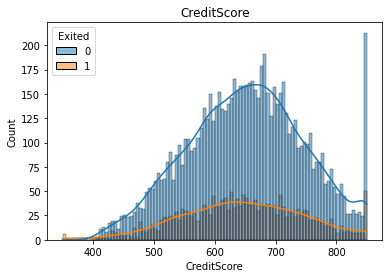

In [9]:
analise_coluna(0)

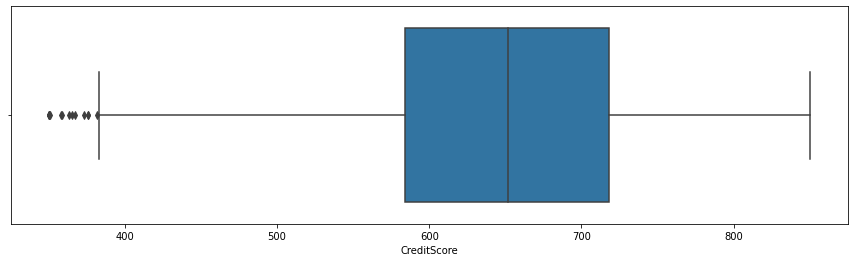

In [10]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df['CreditScore'],hue=df['Exited']);

Coluna: Geography

Quantidade de valores unicos: 3
Valores que mais de repetem:
0    5014
1    2509
2    2477
Name: Geography, dtype: int64
__________________________________________________
Moda: 0
Est. descritivas:
count    10000.000000
mean         0.746300
std          0.827529
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Geography, dtype: float64
__________________________________________________


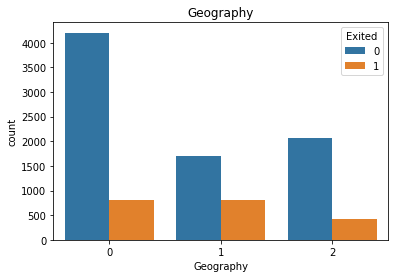

Percentual de saída por categoria:
1    0.399607
0    0.397644
2    0.202749
Name: Geography, dtype: float64


In [11]:
analise_coluna(1)

**Cliente das Alemanha tem maior percentual de saída porporcionalmente a quantidade de contas**

Coluna: Gender

Quantidade de valores unicos: 2
Valores que mais de repetem:
1    5457
0    4543
Name: Gender, dtype: int64
__________________________________________________
Moda: 1
Est. descritivas:
count    10000.000000
mean         0.545700
std          0.497932
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Gender, dtype: float64
__________________________________________________


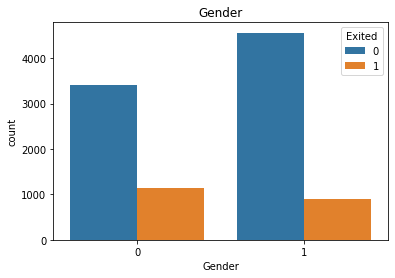

Percentual de saída por categoria:
0    0.559156
1    0.440844
Name: Gender, dtype: float64


In [12]:
analise_coluna(2)

**Podemos identificar uma tendencia maior de churn entre a mulheres**

Coluna: Age

Quantidade de valores unicos: 70
Valores que mais de repetem:
37    478
38    477
35    474
36    456
34    447
Name: Age, dtype: int64
__________________________________________________
Moda: 37
Est. descritivas:
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64
__________________________________________________


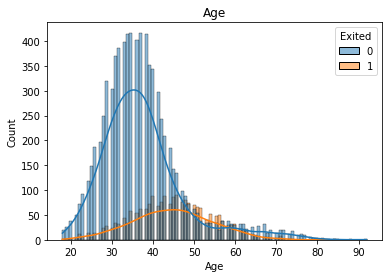

In [13]:
analise_coluna(3)

**Aqui identificamos uma proporção de churn mais alto a partir dos 40 anos**

Coluna: Tenure

Quantidade de valores unicos: 11
Valores que mais de repetem:
2    1048
1    1035
7    1028
8    1025
5    1012
Name: Tenure, dtype: int64
__________________________________________________
Moda: 2
Est. descritivas:
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64
__________________________________________________


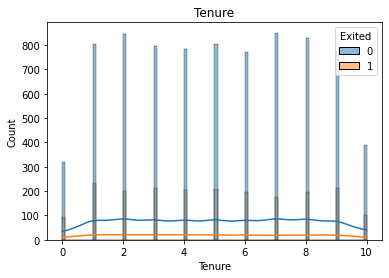

In [14]:
analise_coluna(4)

Coluna: Balance

Quantidade de valores unicos: 6382
Valores que mais de repetem:
0.00         3617
105473.74       2
130170.82       2
72594.00        1
139723.90       1
Name: Balance, dtype: int64
__________________________________________________
Moda: 0.0
Est. descritivas:
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
__________________________________________________


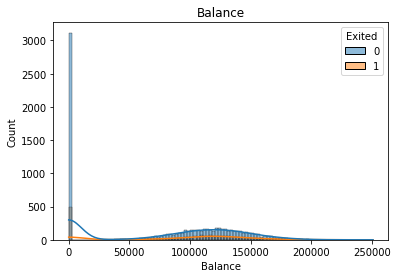

In [15]:
analise_coluna(5)

Coluna: NumOfProducts

Quantidade de valores unicos: 4
Valores que mais de repetem:
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
__________________________________________________
Moda: 1
Est. descritivas:
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64
__________________________________________________


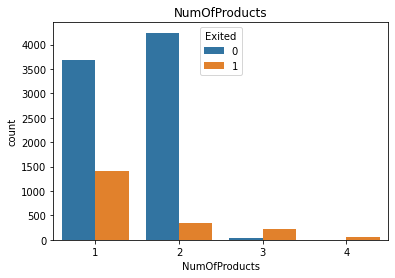

Percentual de saída por categoria:
1    0.691703
2    0.170839
3    0.108002
4    0.029455
Name: NumOfProducts, dtype: float64


In [16]:
analise_coluna(6)

Coluna: HasCrCard

Quantidade de valores unicos: 2
Valores que mais de repetem:
1    7055
0    2945
Name: HasCrCard, dtype: int64
__________________________________________________
Moda: 1
Est. descritivas:
count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64
__________________________________________________


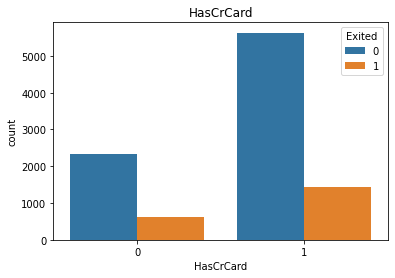

Percentual de saída por categoria:
1    0.699067
0    0.300933
Name: HasCrCard, dtype: float64


In [17]:
analise_coluna(7)

Coluna: IsActiveMember

Quantidade de valores unicos: 2
Valores que mais de repetem:
1    5151
0    4849
Name: IsActiveMember, dtype: int64
__________________________________________________
Moda: 1
Est. descritivas:
count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64
__________________________________________________


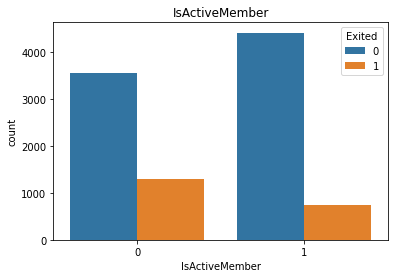

Percentual de saída por categoria:
0    0.639175
1    0.360825
Name: IsActiveMember, dtype: float64


In [18]:
analise_coluna(8)

Coluna: EstimatedSalary

Quantidade de valores unicos: 9999
Valores que mais de repetem:
24924.92     2
109145.20    1
59755.14     1
1557.82      1
117202.19    1
Name: EstimatedSalary, dtype: int64
__________________________________________________
Moda: 24924.92
Est. descritivas:
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64
__________________________________________________


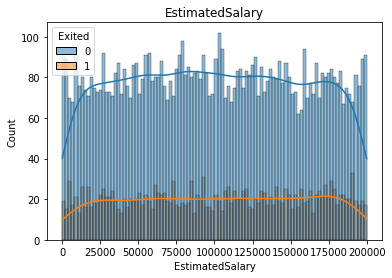

In [19]:
analise_coluna(9)

Coluna: Exited

Quantidade de valores unicos: 2
Valores que mais de repetem:
0    7963
1    2037
Name: Exited, dtype: int64
__________________________________________________
Moda: 0
Est. descritivas:
count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64
__________________________________________________


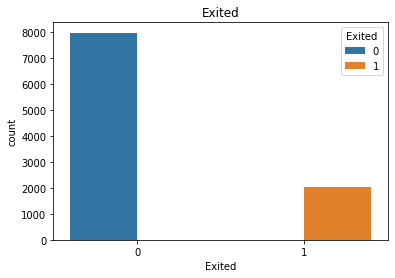

Percentual de saída por categoria:
1    1.0
Name: Exited, dtype: float64


In [20]:
analise_coluna(10)

## Analisando matriz de correlação de Pearson

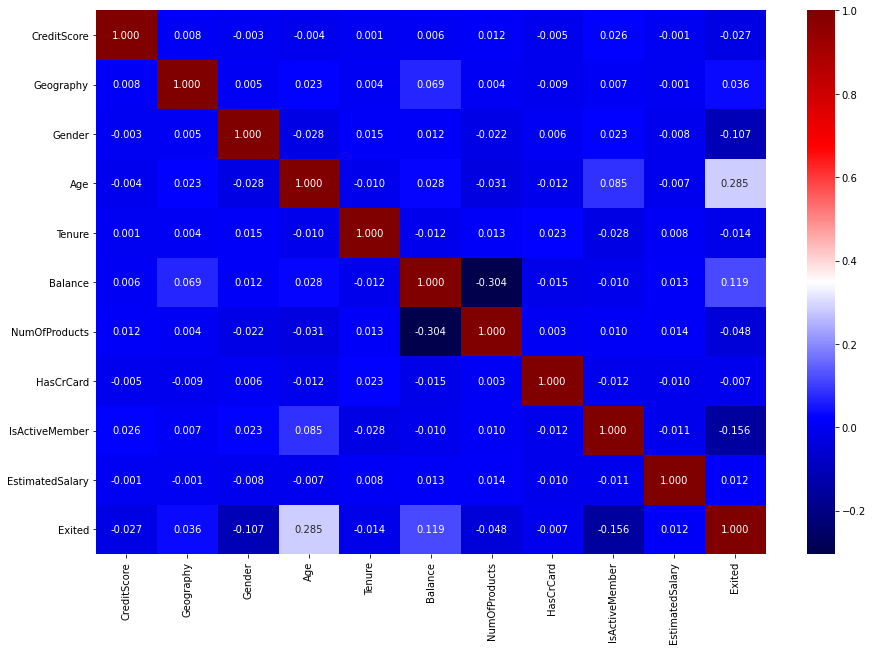

In [21]:
plt.figure(figsize=(15,10))
plt.show(sns.heatmap(df.corr(), fmt='.3f', cmap='seismic', annot=True))

**Aparentemente as labels abaixo explicam a maior parte dos motivos de churn**

In [22]:
df.corr()[(df.corr()['Exited'] > 0.1)|(df.corr()['Exited'] < -0.1)]['Exited']

Gender           -0.106512
Age               0.285323
Balance           0.118533
IsActiveMember   -0.156128
Exited            1.000000
Name: Exited, dtype: float64

## Separando dataframe em X e y e em treino e teste

In [23]:
X = df.drop(columns='Exited')
y = df.Exited

SEED = 1230
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((7000, 10), (3000, 10), (7000,), (3000,))

## Aplicando modelagem

In [24]:
# Criando Baseline
baseline = DummyClassifier()
baseline.fit(X_train, y_train)
print(f'A Baseline é: {baseline.score(X_test, y_test)*100:.2f}%')


A Baseline é: 79.63%


In [25]:
# Modelo DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=SEED)
dtc.fit(X_train, y_train)

dtc_scores = dtc.score(X_test, y_test)

print(f'Acuracia DecisionTreeClassifier: {dtc_scores*100:.2f}%')

Acuracia DecisionTreeClassifier: 79.00%


In [26]:
# Modelo RandomForestClassifier
rfc = RandomForestClassifier(random_state=SEED)
rfc.fit(X_train, y_train)

rfc_score = rfc.score(X_test, y_test)

print(f'Acuracia RandomForestClassifier: {rfc_score*100:.2f}%')

Acuracia RandomForestClassifier: 85.93%


In [27]:
# Modelos XGBoost
xgb = XGBClassifier(random_state=SEED)
xgb.fit(X_train, y_train)

xgb_score = xgb.score(X_test, y_test)

print(f'Acuracia XGBClassifier: {xgb_score*100:.2f}%')

Acuracia XGBClassifier: 85.77%


**O melhor modelo foi o de RandomForest**

In [28]:
# Avaliando as escalas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.746300,0.827529,0.00,0.00,0.000,1.0000,2.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


## Otimizando o modelo

In [29]:
# Escalonando os dados
scaler = StandardScaler()
scaler.fit(X_train)
X_scaler = scaler.transform(X)

print(f'X_scaler: {X_scaler}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

X_scaler: [[-0.33403912 -0.90664498 -1.10617994 ...  0.65331791  0.98243987
   0.02527892]
 [-0.44812909  1.51337976 -1.10617994 ... -1.53064837  0.98243987
   0.22040133]
 [-1.54754148 -0.90664498 -1.10617994 ...  0.65331791 -1.017874
   0.24461344]
 ...
 [ 0.59942423 -0.90664498 -1.10617994 ... -1.53064837  0.98243987
  -1.00776629]
 [ 1.25284858  0.30336739  0.90401206 ...  0.65331791 -1.017874
  -0.12219742]
 [ 1.46028488 -0.90664498 -1.10617994 ...  0.65331791 -1.017874
  -1.0756583 ]]


**Vamos utilizar o modelo RandomForest que apresentou o melhor resultado**

Acuracia RandomForestClassifier: 85.93%


<Axes: >

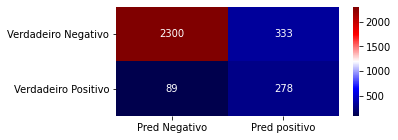

In [30]:
# RandomForestClassifier
rfc = RandomForestClassifier(random_state=SEED)
rfc.fit(X_train, y_train)

rfc_score = rfc.score(X_test, y_test)

print(f'Acuracia RandomForestClassifier: {rfc_score*100:.2f}%')
confusion = pd.DataFrame(confusion_matrix(rfc.predict(X_test), y_test))
confusion.columns = ['Pred Negativo', 'Pred positivo']
confusion.index = ['Verdadeiro Negativo', 'Verdadeiro Positivo']
plt.figure(figsize=(5,2))
display(sns.heatmap(confusion,  cmap='seismic', annot=True, fmt='d'))

**O escalonamento não surtiu resultado. Vamos ajustar os hiperparametros utilizando GridSurchCV**

Modelo RandomForestClassifier
Best parameters: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}
Acuracia RandomForestClassifier: 86.07%


<Axes: >

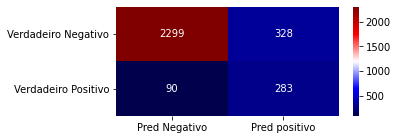

In [31]:
grid = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [2, 4, 6, 8, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

best_score = best_model.score(X_test, y_test)

print('Modelo RandomForestClassifier')
print('Best parameters:', best_params)
print(f'Acuracia RandomForestClassifier: {best_score*100:.2f}%')

confusion = pd.DataFrame(confusion_matrix(best_model.predict(X_test), y_test))
confusion.columns = ['Pred Negativo', 'Pred positivo']
confusion.index = ['Verdadeiro Negativo', 'Verdadeiro Positivo']
plt.figure(figsize=(5,2))
display(sns.heatmap(confusion,  cmap='seismic', annot=True, fmt='d'))

**Os hiperparametros com escalonamento dos dados não surgiram efeito. Vou tentar uma redução de dimensionalidade**

## Redução de dimensionalidade

In [32]:
pca = PCA(n_components=4)
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_

total_explicado = sum(explained_variance_ratio).round(2)

print('Variância explicada:')
print(explained_variance_ratio)
print(f'\nVariância total explicada: {total_explicado*100}%')


Variância explicada:
[5.41184037e-01 4.58814649e-01 1.29726452e-06 1.52621270e-08]

Variância total explicada: 100.0%


Modelo RandomForestClassifier
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
Acuracia RandomForestClassifier: 80.40%


<Axes: >

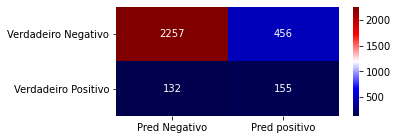

In [33]:
# Aplicando o modelo ao DataFrame reduzido

X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=SEED)

grid = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [2, 4, 6, 8, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

best_score = best_model.score(X_test, y_test)

print('Modelo RandomForestClassifier')
print('Best parameters:', best_params)
print(f'Acuracia RandomForestClassifier: {best_score*100:.2f}%')

confusion = pd.DataFrame(confusion_matrix(best_model.predict(X_test), y_test))
confusion.columns = ['Pred Negativo', 'Pred positivo']
confusion.index = ['Verdadeiro Negativo', 'Verdadeiro Positivo']
plt.figure(figsize=(5,2))
display(sns.heatmap(confusion,  cmap='seismic', annot=True, fmt='d'))

**Ao final, o modelo apresentou o melhor resultado, trabalhando com os dados sem processamento**

Acuracia RandomForestClassifier: 86.37%


<Axes: >

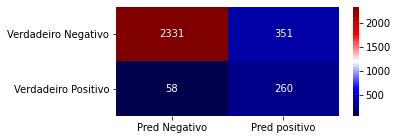

In [34]:
#RandomForestClassifier
X = df.drop(columns='Exited')
y = df.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

rfc = RandomForestClassifier(max_depth = 8,
                             n_estimators = 200,
                             random_state=SEED)

rfc.fit(X_train, y_train)

rfc_score = rfc.score(X_test, y_test)

print(f'Acuracia RandomForestClassifier: {rfc_score*100:.2f}%')

confusion = pd.DataFrame(confusion_matrix(rfc.predict(X_test), y_test))
confusion.columns = ['Pred Negativo', 'Pred positivo']
confusion.index = ['Verdadeiro Negativo', 'Verdadeiro Positivo']
plt.figure(figsize=(5,2))
display(sns.heatmap(confusion, cmap='seismic', annot=True, fmt='d'))

## Acuracia de 86,37%, utilizando RandomForest